# Read Data

In [93]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [94]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [95]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(trainset, batch_size= 4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(testset, batch_size= 200, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


# Visualization

In [96]:
a = next(iter(train_loader))
image,labels = a

In [97]:
labels.size()

torch.Size([4])

In [98]:
image.size()

torch.Size([4, 3, 32, 32])

In [99]:
labels

tensor([9, 6, 7, 7])

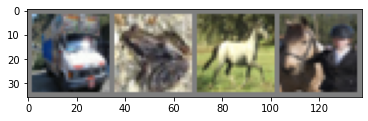

truck , frog , horse , horse


In [100]:
img = torchvision.utils.make_grid(image) / 2 + 0.5     # unnormalize
npimg = img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()
print(f'{classes[labels[0]]} , {classes[labels[1]]} , {classes[labels[2]]} , {classes[labels[3]]}')

# Build Model

In [12]:
conv1 = nn.Conv2d(3, 6, 5)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(6, 16, 5)
print(image.size())
x = conv1(image)
print(x.size())
x = pool(x)
print(x.size())
x = conv2(x)
print(x.size())
x = pool(x)
x = torch.flatten(x,1)
print(x.size())

torch.Size([4, 3, 32, 32])
torch.Size([4, 6, 28, 28])
torch.Size([4, 6, 14, 14])
torch.Size([4, 16, 10, 10])
torch.Size([4, 400])


In [52]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(400, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [53]:
cnn = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

In [54]:
loss_list = []
iteration_list = []
accuracy_list = []
labels_list = []
predictions_list = []
count = 0
for epoch in range(5):  # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = cnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    count += 1


    if i % 1000 == 999:
      total = 0
      correct = 0
      a = next(iter(test_loader))
      image,labels = a

      labels_list.append(labels)
    
      outputs = cnn(image)
  
      predictions = torch.max(outputs, 1)[1]
      predictions_list.append(predictions)
      correct += (predictions == labels).sum()
  
      total += len(labels)
      
      accuracy = correct * 100 / total
      
      iteration_list.append(count)
      accuracy_list.append(accuracy)    

    # print statistics
    running_loss += loss.item()
    if i % 1000 == 999:    # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      loss_list.append(running_loss / 2000)
      running_loss = 0.0
  

print('Finished Training')

[1,  1000] loss: 1.130
[1,  2000] loss: 1.016
[1,  3000] loss: 0.929
[1,  4000] loss: 0.871
[1,  5000] loss: 0.831
[1,  6000] loss: 0.797
[1,  7000] loss: 0.771
[1,  8000] loss: 0.776
[1,  9000] loss: 0.747
[1, 10000] loss: 0.732
[1, 11000] loss: 0.734
[1, 12000] loss: 0.717
[2,  1000] loss: 0.697
[2,  2000] loss: 0.686
[2,  3000] loss: 0.667
[2,  4000] loss: 0.656
[2,  5000] loss: 0.671
[2,  6000] loss: 0.657
[2,  7000] loss: 0.648
[2,  8000] loss: 0.647
[2,  9000] loss: 0.639
[2, 10000] loss: 0.637
[2, 11000] loss: 0.631
[2, 12000] loss: 0.618
[3,  1000] loss: 0.598
[3,  2000] loss: 0.583
[3,  3000] loss: 0.593
[3,  4000] loss: 0.577
[3,  5000] loss: 0.577
[3,  6000] loss: 0.579
[3,  7000] loss: 0.570
[3,  8000] loss: 0.556
[3,  9000] loss: 0.577
[3, 10000] loss: 0.552
[3, 11000] loss: 0.554
[3, 12000] loss: 0.547
[4,  1000] loss: 0.509
[4,  2000] loss: 0.492
[4,  3000] loss: 0.523
[4,  4000] loss: 0.510
[4,  5000] loss: 0.514
[4,  6000] loss: 0.513
[4,  7000] loss: 0.514
[4,  8000] 

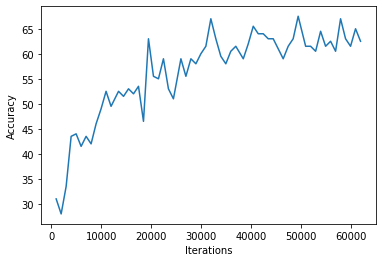

In [55]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

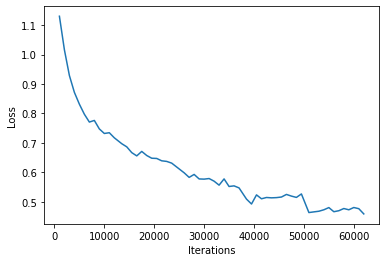

In [56]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [57]:
correct = 0
total = 0
predicted_arr = []
labels_arr = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cnn(images)
        # the class with the highest energy is what we choose as prediction
        predicted = torch.max(outputs.data, 1)[1]
        temp_predicted = np.array(predicted)
        temp_labels = np.array(labels)
        for num in temp_predicted:
          predicted_arr.append(num)
        for num in temp_labels:
          labels_arr.append(num)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 64 %


In [61]:
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(labels_arr, predicted_arr)

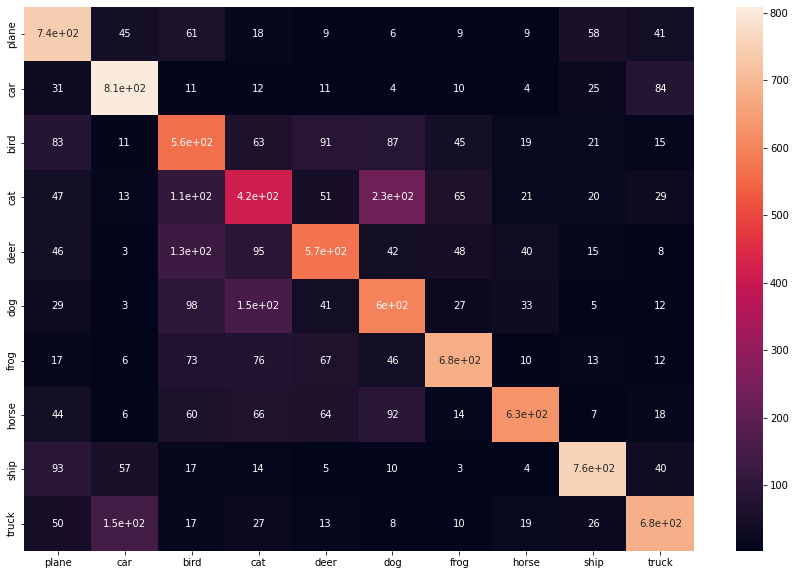

In [66]:
import seaborn as sn
import pandas as pdimport seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(arr, index = classes,
                  columns = classes)
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(arr, index = classes,
                  columns = classes)
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(labels_arr, predicted_arr, target_names=classes))

              precision    recall  f1-score   support

       plane       0.64      0.71      0.67      1000
         car       0.73      0.80      0.77      1000
        bird       0.59      0.41      0.48      1000
         cat       0.38      0.47      0.43      1000
        deer       0.54      0.54      0.54      1000
         dog       0.67      0.34      0.46      1000
        frog       0.59      0.79      0.67      1000
       horse       0.65      0.72      0.68      1000
        ship       0.77      0.68      0.72      1000
       truck       0.70      0.69      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.63      0.62      0.61     10000
weighted avg       0.63      0.62      0.61     10000



# Model With Batch Normalization

In [67]:
class CNN_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.batch1 = nn.BatchNorm2d(6)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.batch2 = nn.BatchNorm2d(16)
        self.fc1 = nn.Linear(400, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(F.relu(self.batch1(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.batch2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [68]:
cnn = CNN_BN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

In [69]:
loss_list = []
iteration_list = []
accuracy_list = []
labels_list = []
predictions_list = []
count = 0
for epoch in range(5):  # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = cnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    count += 1


    if i % 1000 == 999:
      total = 0
      correct = 0
      a = next(iter(test_loader))
      image,labels = a

      labels_list.append(labels)
    
      outputs = cnn(image)
  
      predictions = torch.max(outputs, 1)[1]
      predictions_list.append(predictions)
      correct += (predictions == labels).sum()
  
      total += len(labels)
      
      accuracy = correct * 100 / total
      
      iteration_list.append(count)
      accuracy_list.append(accuracy)    

    # print statistics
    running_loss += loss.item()
    if i % 1000 == 999:    # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      loss_list.append(running_loss / 2000)
      running_loss = 0.0
  

print('Finished Training')

[1,  1000] loss: 1.036
[1,  2000] loss: 0.907
[1,  3000] loss: 0.858
[1,  4000] loss: 0.825
[1,  5000] loss: 0.788
[1,  6000] loss: 0.765
[1,  7000] loss: 0.767
[1,  8000] loss: 0.754
[1,  9000] loss: 0.740
[1, 10000] loss: 0.738
[1, 11000] loss: 0.730
[1, 12000] loss: 0.716
[2,  1000] loss: 0.691
[2,  2000] loss: 0.683
[2,  3000] loss: 0.656
[2,  4000] loss: 0.670
[2,  6000] loss: 0.661
[2,  7000] loss: 0.646
[2,  8000] loss: 0.664
[2,  9000] loss: 0.622
[2, 10000] loss: 0.647
[2, 11000] loss: 0.634
[2, 12000] loss: 0.635
[3,  1000] loss: 0.595
[3,  2000] loss: 0.599
[3,  3000] loss: 0.589
[3,  4000] loss: 0.607
[3,  5000] loss: 0.586
[3,  6000] loss: 0.579
[3,  7000] loss: 0.599
[3,  8000] loss: 0.555
[3,  9000] loss: 0.592
[3, 10000] loss: 0.585
[3, 11000] loss: 0.573
[3, 12000] loss: 0.572
[4,  1000] loss: 0.533
[4,  2000] loss: 0.545
[4,  3000] loss: 0.543
[4,  4000] loss: 0.522
[4,  5000] loss: 0.542
[4,  6000] loss: 0.554
[4,  7000] loss: 0.532
[4,  8000] loss: 0.552
[4,  9000] 

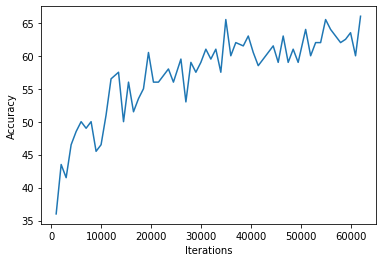

In [75]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

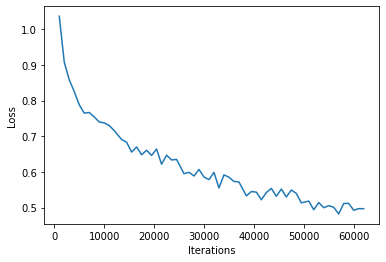

In [77]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [78]:
correct = 0
total = 0
predicted_arr = []
labels_arr = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cnn(images)
        # the class with the highest energy is what we choose as prediction
        predicted = torch.max(outputs.data, 1)[1]
        temp_predicted = np.array(predicted)
        temp_labels = np.array(labels)
        for num in temp_predicted:
          predicted_arr.append(num)
        for num in temp_labels:
          labels_arr.append(num)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 64 %


In [79]:
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(labels_arr, predicted_arr)

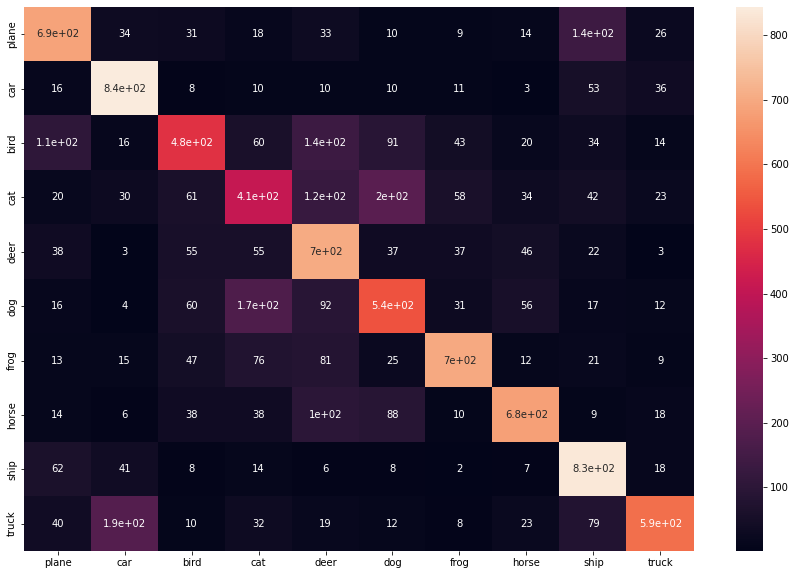

In [80]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(arr, index = classes,
                  columns = classes)
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)

In [81]:
from sklearn.metrics import classification_report
print(classification_report(labels_arr, predicted_arr, target_names=classes))

              precision    recall  f1-score   support

       plane       0.68      0.69      0.68      1000
         car       0.71      0.84      0.77      1000
        bird       0.60      0.48      0.53      1000
         cat       0.46      0.41      0.43      1000
        deer       0.54      0.70      0.61      1000
         dog       0.53      0.54      0.53      1000
        frog       0.77      0.70      0.73      1000
       horse       0.76      0.68      0.72      1000
        ship       0.67      0.83      0.74      1000
       truck       0.79      0.59      0.67      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



# Another Model

In [101]:
conv1 = nn.Conv2d(3, 30, 3)
pool = nn.MaxPool2d(2, 2)
conv2 = nn.Conv2d(30, 30, 3)
print(image.size())
x = conv1(image)
print(x.size())
x = pool(x)
print(x.size())
x = conv2(x)
print(x.size())
x = pool(x)
x = torch.flatten(x,1)
print(x.size())

torch.Size([4, 3, 32, 32])
torch.Size([4, 30, 30, 30])
torch.Size([4, 30, 15, 15])
torch.Size([4, 30, 13, 13])
torch.Size([4, 1080])


In [102]:
class CNN_BN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 30, 3)
        self.batch1 = nn.BatchNorm2d(30)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(30, 30, 3)
        self.batch2 = nn.BatchNorm2d(30)
        self.fc1 = nn.Linear(1080, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.pool(F.relu(self.batch1(x)))
        x = self.conv2(x)
        x = self.pool(F.relu(self.batch2(x)))
        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))        
        x = self.fc4(x)
        return x

In [103]:
cnn = CNN_BN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn.parameters(), lr=0.001, momentum=0.9)

In [104]:
loss_list = []
iteration_list = []
accuracy_list = []
labels_list = []
predictions_list = []
count = 0
for epoch in range(5):  # loop over the dataset multiple times

  running_loss = 0.0
  for i, data in enumerate(train_loader, 0):
    # get the inputs; data is a list of [inputs, labels]
    inputs, labels = data

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = cnn(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    count += 1


    if i % 1000 == 999:
      total = 0
      correct = 0
      a = next(iter(test_loader))
      image,labels = a

      labels_list.append(labels)
    
      outputs = cnn(image)
  
      predictions = torch.max(outputs, 1)[1]
      predictions_list.append(predictions)
      correct += (predictions == labels).sum()
  
      total += len(labels)
      
      accuracy = correct * 100 / total
      
      iteration_list.append(count)
      accuracy_list.append(accuracy)    

    # print statistics
    running_loss += loss.item()
    if i % 1000 == 999:    # print every 2000 mini-batches
      print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
      loss_list.append(running_loss / 2000)
      running_loss = 0.0
  

print('Finished Training')

[1,  1000] loss: 1.048
[1,  2000] loss: 0.895
[1,  3000] loss: 0.817
[1,  4000] loss: 0.787
[1,  5000] loss: 0.746
[1,  6000] loss: 0.717
[1,  7000] loss: 0.685
[1,  8000] loss: 0.684
[1,  9000] loss: 0.662
[1, 10000] loss: 0.654
[1, 11000] loss: 0.638
[1, 12000] loss: 0.612
[2,  1000] loss: 0.595
[2,  2000] loss: 0.575
[2,  3000] loss: 0.557
[2,  4000] loss: 0.550
[2,  5000] loss: 0.548
[2,  6000] loss: 0.535
[2,  7000] loss: 0.541
[2,  8000] loss: 0.531
[2,  9000] loss: 0.506
[2, 10000] loss: 0.522
[2, 11000] loss: 0.512
[2, 12000] loss: 0.513
[3,  1000] loss: 0.461
[3,  2000] loss: 0.460
[3,  3000] loss: 0.461
[3,  5000] loss: 0.452
[3,  6000] loss: 0.448
[3,  7000] loss: 0.433
[3,  8000] loss: 0.449
[3,  9000] loss: 0.453
[3, 10000] loss: 0.451
[3, 11000] loss: 0.446
[3, 12000] loss: 0.447
[4,  1000] loss: 0.389
[4,  2000] loss: 0.390
[4,  3000] loss: 0.370
[4,  4000] loss: 0.385
[4,  5000] loss: 0.410
[4,  6000] loss: 0.389
[4,  7000] loss: 0.403
[4,  8000] loss: 0.387
[4,  9000] 

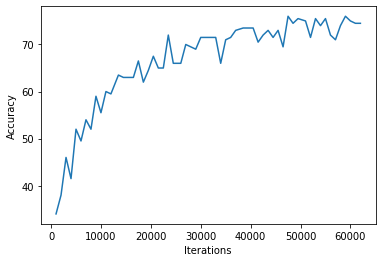

In [111]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.show()

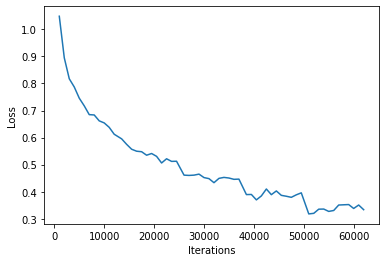

In [112]:
plt.plot(iteration_list, loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [113]:
correct = 0
total = 0
predicted_arr = []
labels_arr = []
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = cnn(images)
        # the class with the highest energy is what we choose as prediction
        predicted = torch.max(outputs.data, 1)[1]
        temp_predicted = np.array(predicted)
        temp_labels = np.array(labels)
        for num in temp_predicted:
          predicted_arr.append(num)
        for num in temp_labels:
          labels_arr.append(num)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 69 %


In [108]:
from sklearn.metrics import confusion_matrix
arr = confusion_matrix(labels_arr, predicted_arr)

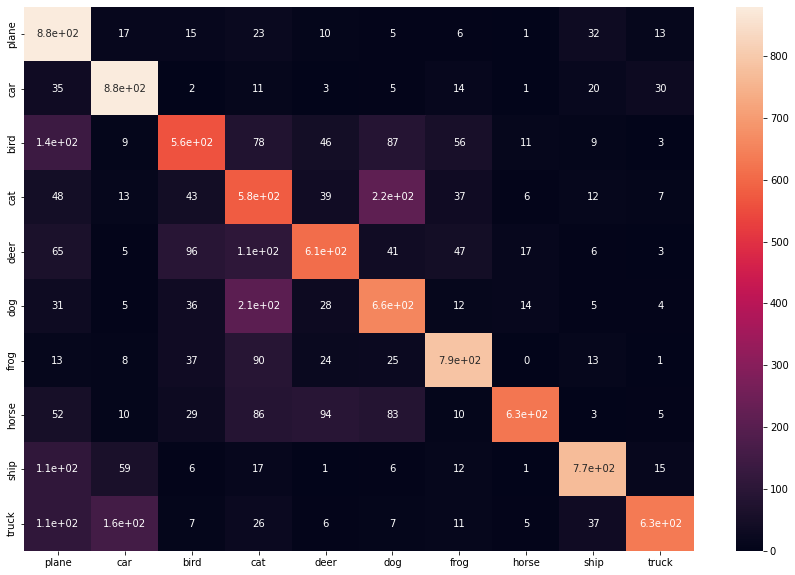

In [109]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
df_cm = pd.DataFrame(arr, index = classes,
                  columns = classes)
plt.figure(figsize = (15,10))
sn.heatmap(df_cm, annot=True)

In [110]:
from sklearn.metrics import classification_report
print(classification_report(labels_arr, predicted_arr, target_names=classes))

              precision    recall  f1-score   support

       plane       0.59      0.88      0.71      1000
         car       0.76      0.88      0.81      1000
        bird       0.67      0.56      0.61      1000
         cat       0.47      0.58      0.52      1000
        deer       0.71      0.61      0.66      1000
         dog       0.58      0.66      0.62      1000
        frog       0.79      0.79      0.79      1000
       horse       0.92      0.63      0.75      1000
        ship       0.85      0.77      0.81      1000
       truck       0.89      0.63      0.74      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.70     10000
weighted avg       0.72      0.70      0.70     10000

